# Bike Data Exploration
## by Mansour Al Rajhi

## Preliminary Wrangling

> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
# load in the dataset into a pandas dataframe, print statistics
bike = pd.read_csv('2017-fordgobike-tripdata.csv')

In [3]:
# high-level overview of data shape and composition
print(bike.shape)
print(bike.dtypes)
print(bike.head(10))

(519700, 15)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id             int64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id               int64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
dtype: object
   duration_sec                start_time                  end_time  \
0         80110  2017-12-31 16:57:39.6540  2018-01-01 15:12:50.2450   
1         78800  2017-12-31 15:56:34.8420  2018-01-01 13:49:55.6170   
2         45768  2017-12-31 22:45:48.4110  2018-01-01 11:28:36.8830   
3         62172  2017-12-31 17:31:10.6360  2018-01-01 10:47:23.5310   
4         43603  2017-12-31 14:23:14.0010  2018-01-01 02:29:57.5710   
5          9226  2017-

In [4]:
# descriptive statistics for numeric variables
print(bike.describe())

        duration_sec  start_station_id  start_station_latitude  \
count  519700.000000     519700.000000           519700.000000   
mean     1099.009521         95.034245               37.771653   
std      3444.146451         86.083078                0.086305   
min        61.000000          3.000000               37.317298   
25%       382.000000         24.000000               37.773492   
50%       596.000000         67.000000               37.783521   
75%       938.000000        139.000000               37.795392   
max     86369.000000        340.000000               37.880222   

       start_station_longitude  end_station_id  end_station_latitude  \
count            519700.000000   519700.000000         519700.000000   
mean               -122.363927       92.184041             37.771844   
std                   0.105573       84.969491              0.086224   
min                -122.444293        3.000000             37.317298   
25%                -122.411726       23.00000

### What is the structure of your dataset?

> The dataset have 15 columns about bike rental information and 519700 rows about each rental. 

### What is/are the main feature(s) of interest in your dataset?

> The main interest of the dataset is to identify the largest customer segment that we should target in marketing the Bike transit system.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The columns that we will be using the most will be: user type, member birth year, member gender, duration sec, start time, end time.

## Univariate Exploration

> We will start investigate the main viarbles of the dataset

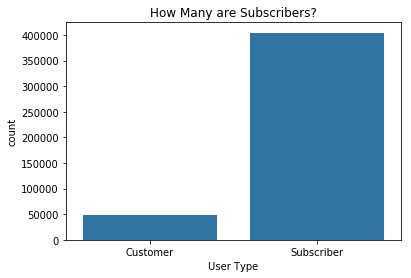

In [22]:
ax = sb.countplot(data = bike, x = 'user_type', color = default_color)
ax.set_title('How Many are Subscribers?')
plt.xlabel('User Type')
plt.show()

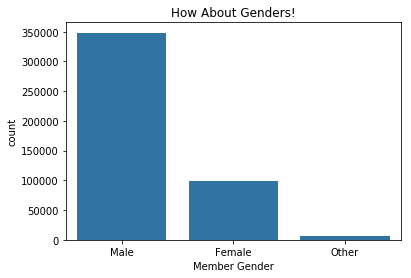

In [23]:
ax = sb.countplot(data = bike, x = 'member_gender', color = default_color)
ax.set_title('How About Genders!')
plt.xlabel('Member Gender')
plt.show()

#### We can notice that more subscribers use the bike service than the general public. Also, we notice that more Male use the bikes than Female.

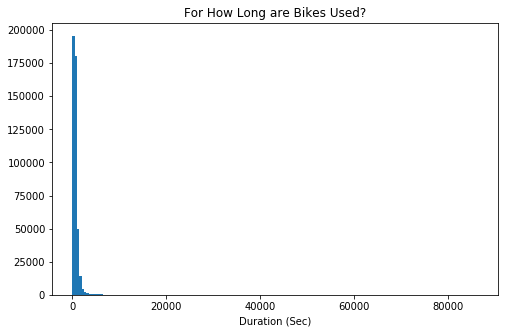

In [24]:
# start with a standard-scaled plot of the duration seconds
binsize = 500
bins = np.arange(0, bike['duration_sec'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = bike, x = 'duration_sec', bins = bins)
plt.xlabel('Duration (Sec)')
plt.title("For How Long are Bikes Used?")
plt.show()

#### Since we have ouliers we need to take the log of the distribution to visulize the duration plot more accurately

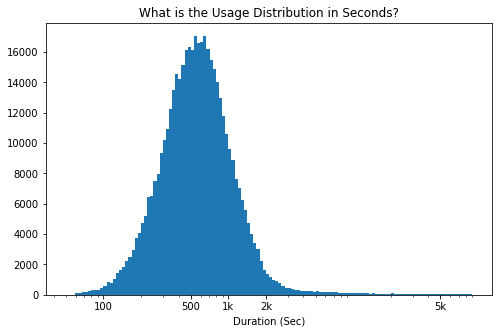

In [25]:
# there's a long tail in the distribution, so let's put it on a log scale instead
log_binsize = 0.025
bins = 10 ** np.arange(1.7, np.log10(bike['duration_sec'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = bike, x = 'duration_sec', bins = bins)
plt.xscale('log')
plt.xticks([100, 500, 1e3, 2e3, 5e4], [100, 500, '1k', '2k', '5k'])
plt.xlabel('Duration (Sec)')
plt.title("What is the Usage Distribution in Seconds?")
plt.show()

#### We notice the Duration is median at approximatly 600 seconds which is equivelant to 10 minutes. We can attribute that 10 minutes duration to first time users who are just trying the service which they tend to try it for a shorter period

In [8]:
# convert member birth year to int
bike.member_birth_year = pd.to_datetime(bike.member_birth_year)
bike.member_birth_year = bike.member_birth_year.astype(int,copy=False)
bike = bike[bike['member_birth_year'].notnull()]

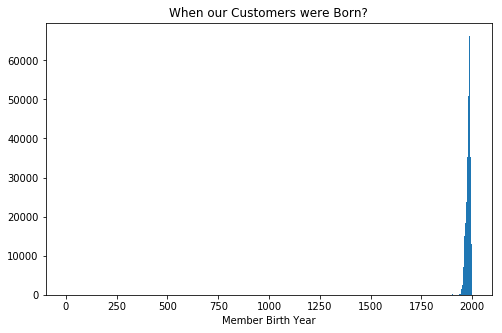

In [26]:
bins = np.arange(0, bike['member_birth_year'].max(), 3)

plt.figure(figsize=[8, 5])
plt.hist(data = bike, x = 'member_birth_year', bins = bins)
plt.xlabel('Member Birth Year')
plt.title("When our Customers were Born?")
plt.show()

#### Plotting the member birth year did give us unreadable plot. So, we better calculate the members age and plot it instead.

In [10]:
bike['member_age'] = 2017 - bike.member_birth_year

In [11]:
bike.member_age.value_counts()

-9223372036854773791    66541
 32                     24342
 29                     23610
 30                     22493
 33                     21061
 35                     21005
 31                     20134
 34                     19270
 28                     19202
 27                     16832
 26                     16009
 36                     15132
 37                     14817
 24                     13394
 38                     12691
 25                     11928
 40                     11798
 42                     11454
 39                     10845
 23                      9932
 44                      9230
 43                      9186
 49                      9038
 41                      8782
 52                      7926
 46                      7892
 47                      7599
 50                      6650
 45                      6645
 22                      6616
                        ...  
 60                      1525
 62                      1082
 65       

In [12]:
bike.drop(bike[bike.member_age < 0].index, inplace = True)

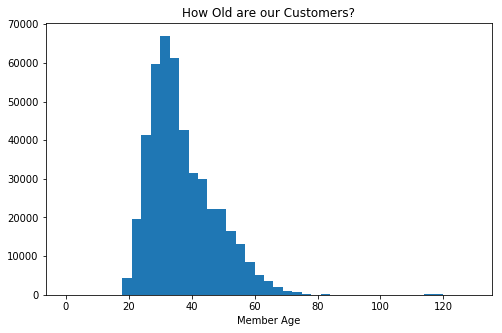

In [27]:
bins = np.arange(0, bike['member_age'].max(), 3)

plt.figure(figsize=[8, 5])
plt.hist(data = bike, x = 'member_age', bins = bins)
plt.xlabel('Member Age')
plt.title("How Old are our Customers?")
plt.show()

#### We can observe the median range of members age at around 30 years old

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The distribution of Member Age is skewed to the left where most of the users are between the age 25 and 40. Also, the Duration of usage looks normal with medina of 1000 second which is 16 minutes approximatly.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> We converted member birth year into integr to calculate the age of each member in order for us to plot the age distribution of the users age.

## Bivariate Exploration

> In this section, we investigate the relationships between pairs of variables.

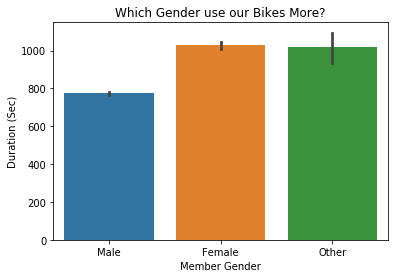

In [28]:
ax = sb.barplot(data = bike, x = 'member_gender', y = 'duration_sec');
ax.set(xlabel='Member Gender', ylabel='Duration (Sec)');
ax.set_title('Which Gender use our Bikes More?');

#### Females use the bike service for a longer period than Males which might be attributable to the larger population of Male users

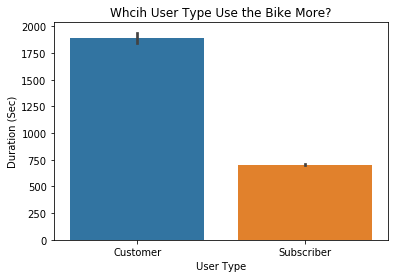

In [29]:
ax = sb.barplot(data = bike, x = 'user_type', y = 'duration_sec');
ax.set(xlabel='User Type', ylabel='Duration (Sec)');
ax.set_title('Whcih User Type Use the Bike More?');

#### Customers are using the service longer than Subscribers, which might be due to tourist activity and usage behavior

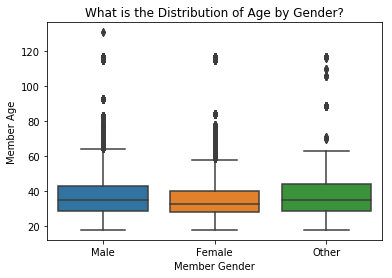

In [30]:
ax = sb.boxplot(x=bike["member_gender"], y=bike["member_age"]);
ax.set(xlabel='Member Gender', ylabel='Member Age');
ax.set_title('What is the Distribution of Age by Gender?');

#### Males users are older and have a wider spectrum of users age that the Female users who concentrate in the younger generation

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> We can notice that Female users tend to use the bike at longer duration than Male users. Also, customer use the bike service for a longer duration than subscribers of the bike service which might be becuase that most of the customers who are not subscribers are actually tourist who use the bike to enjoy thier time in San Francisco. Finally, Male users tend to be older and have an older median than the Female users.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Many users did register their information wrongly or left it empty particularly in the date of birth info which created a huge distribution age birth year. We delt with that by removing all non values entries.

## Multivariate Exploration

> > In this section, we investigate the relationships between multivariate variables.

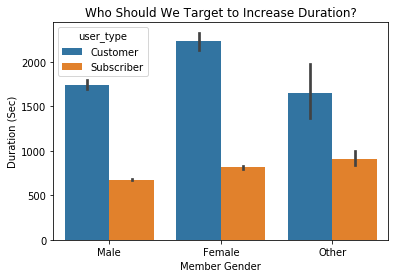

In [33]:
ax = sb.barplot(data = bike, x = 'member_gender', y = 'duration_sec', hue = 'user_type');
ax.set(xlabel='Member Gender', ylabel='Duration (Sec)');
ax.set_title('Who Should We Target to Increase Duration?');

#### Females are using the service longer across all type of users

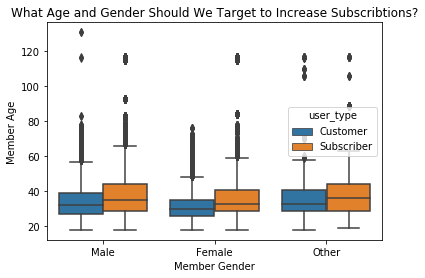

In [32]:
ax = sb.boxplot(x=bike["member_gender"], y=bike["member_age"], hue = bike['user_type']);
ax.set(xlabel='Member Gender', ylabel='Member Age');
ax.set_title('What Age and Gender Should We Target to Increase Subscribtions?');

#### Males are older across all type of users compared to the Female users

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Females use the bike service for a longer period whether they are customers of subscribers. However, Subscribers are older in general in both genders with larger age gap in users.

### Were there any interesting or surprising interactions between features?

> At first we thought that Male users are dominante and should be our target users; however, after further analysis we can see that the Female segment is important and more avid users even at older age.